In [293]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter
import pandas as pd


In [294]:
def apply_filter(data=None, choice=None):
    # Interpolate (and possibly filter) the data first
    section = interpolate_and_filter(data, choice)

    # Invert the plot if the flag is set

    inverted_section = -section
    # Move the inverted data back to zero
    min_value = np.min(inverted_section)
    section = inverted_section - min_value

    return section

def interpolate_and_filter(row, choice):
    """
    Interpolate and filter.

    Args:
        choice: filter type.
        row: profile to interpolate and filter.
    """

    # Interpolate missing values
    data_filtered = pd.Series(
        np.where(row == 0, np.nan, row)
    ).interpolate().ffill().bfill()

    # Apply filters
    if choice == "Gaussian":
        data_filtered_smoothed = gaussian_filter(
            data_filtered, sigma=10, mode="nearest"
        )
    elif choice == "Median":
        data_filtered_smoothed = median_filter(
            data_filtered, size=10, mode="nearest"
        )
    elif choice == "Linear":
        # Find the indices where the weld is
        i_weld = np.where(row < np.percentile(row, 90))[0]
        if i_weld.size == 0:
            return data_filtered
        data_filtered_smoothed = np.interp(np.arange(0, len(row)), i_weld, row[i_weld])
        return data_filtered

    return data_filtered_smoothed


In [295]:
data = np.load("19-01-2024-15-40-52/ranges_19-01-2024-15-40-52.npy")[0][100]
cursor_limits = {
    "x_min": 0,
    "x_max": 1600,
    "y_min": 0,
    "y_max": 70,
}



(0.0, 70.0)

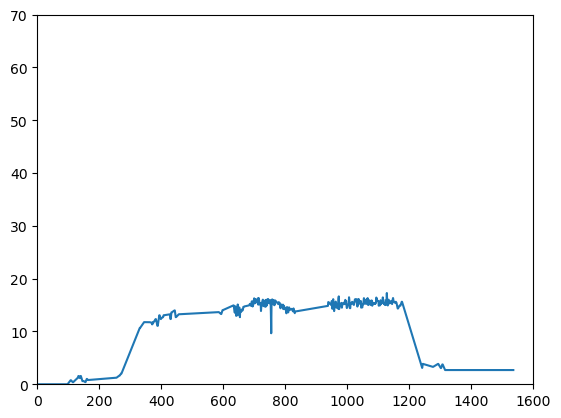

In [296]:
interpolated_data  = apply_filter(data, "Linear")
plt.plot(interpolated_data)
plt.xlim(cursor_limits["x_min"], cursor_limits["x_max"])
plt.ylim(cursor_limits["y_min"], cursor_limits["y_max"])

In [297]:
# Alterate possibility
def rotate(arr, angle_deg):
    angle_rad = np.deg2rad(angle_deg)
    r_mat = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
             [np.sin(angle_rad), np.cos(angle_rad)]])
    print(r_mat.shape)
    matrix = np.array([np.arange(len(arr)), np.array(arr)])
    print(matrix.shape)
    rotated = (matrix.T @ r_mat).T
    print(rotated.shape)
    return rotated[1]

(2, 2)
(2, 1536)
(2, 1536)


(0.0, 70.0)

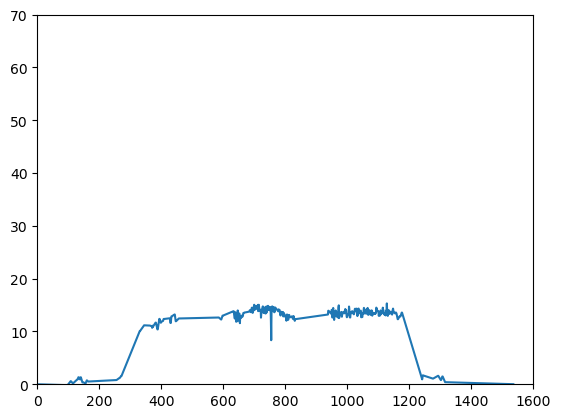

In [298]:
rotated_data = rotate(interpolated_data, 0.1)
plt.plot(rotated_data)
plt.xlim(cursor_limits["x_min"], cursor_limits["x_max"])
plt.ylim(cursor_limits["y_min"], cursor_limits["y_max"])

In [299]:
def lower_data(data: list, point1: tuple[float, float], point2: tuple[float, float]) -> np.array:
    """
        Lowers the y-values of the data.

        Points 1 and 2 form a line and that line is the new height 0 (new x-axis).

        Args:
            data: Data to lower.
            point1: (x, y).
            point2: (x, y).

        Returns:
            Lowered data.
    """
    x1 = point1[0]
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1]

    if x2 == x1:
        return np.array(data)

    slope = (y2 - y1)/(x2 - x1)
    intercept = y1 - slope * x1

    lowered_data = np.array(data) - (np.arange(len(data))*slope + intercept)
    return lowered_data

(0.0, 70.0)

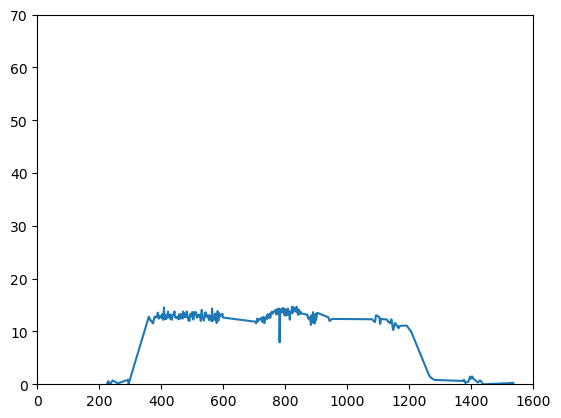

In [300]:
plt.plot(lower_data(np.flip(interpolated_data,axis=0), (300,3), (1250,0.5)))
plt.xlim(cursor_limits["x_min"], cursor_limits["x_max"])
plt.ylim(cursor_limits["y_min"], cursor_limits["y_max"])